## Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image
# 이미지 로드해주는 라이브러리

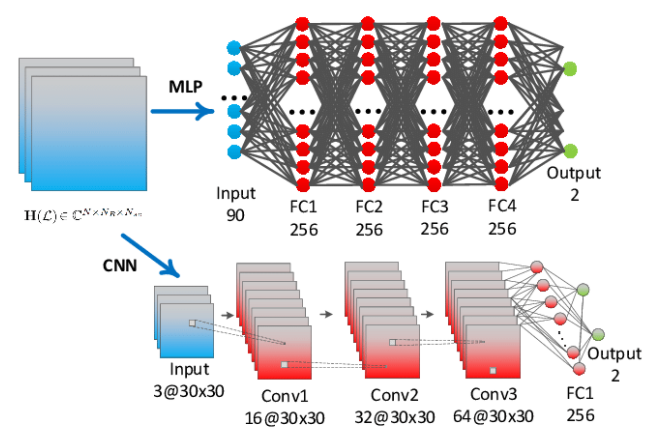

In [3]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/mlp_conv.png')

## VGG Net

* 특정 이미지를 잘 학습하는 Model 구조가 있지 않을까?

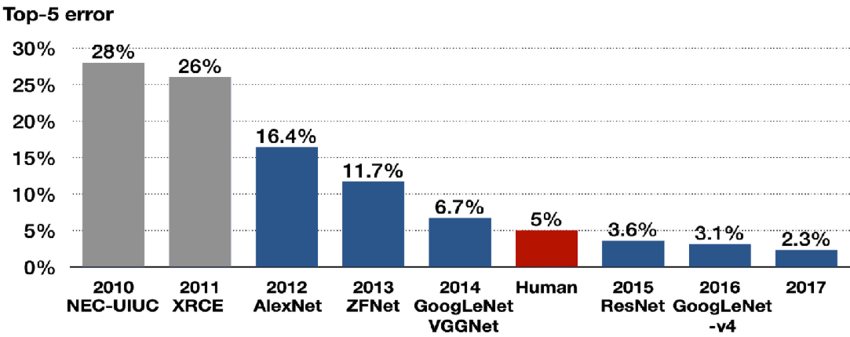

In [4]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/ic.png')

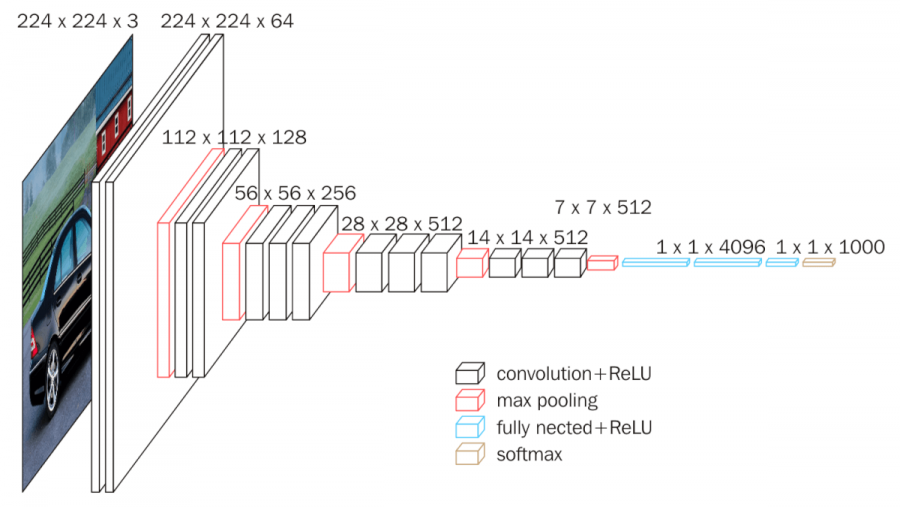

In [5]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/VGG16.png')

## ResNet

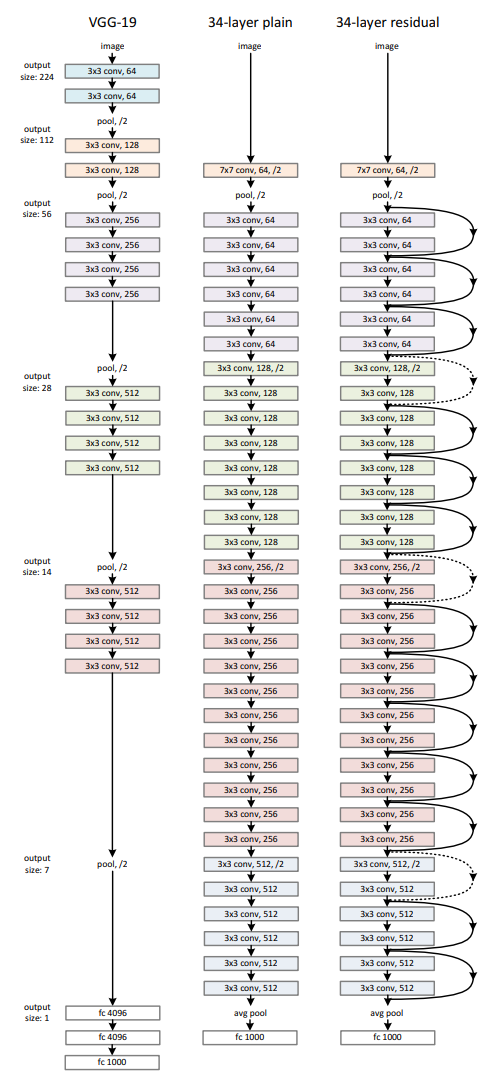

In [6]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/resnet.png')

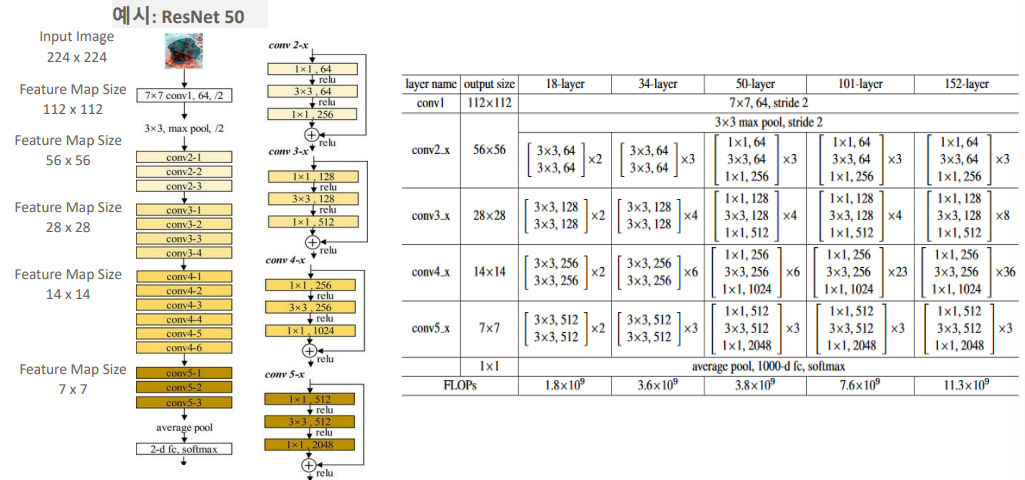

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/res_stage.png')

1) input이 들어오면 7x7 Conv 진행<br>
2) Conv를 3번씩 반복 + Residual<br>
3) 중간, 중간 feature map size를 줄여주는 작업

* Residul Block

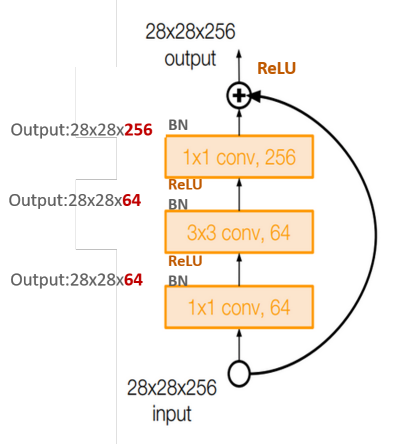

In [7]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/identity.png')

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation
from tensorflow.keras.layers import add, Add

def identity_block(input_tensor, middle_kernel_size, filters, stage, block):
    # 위의 block을 생성하는 함수
    '''
    함수 입력 인자 설명
    input_tensor는 입력 tensor
    middle_kernel_size 중간에 위치하는 kernel 크기. identity block내에 있는 두개의 conv layer중 1x1 kernel이 아니고, 3x3 kernel임. 
    3x3 커널이 이외에도 5x5 kernel도 지정할 수 있게 구성. 
    filters: 3개 conv layer들의 filter개수를 list 형태로 입력 받음. 첫번째 원소는 첫번째 1x1 filter 개수, 두번째는 3x3 filter 개수, 세번째는 마지막 1x1 filter 개수
    stage: identity block들이 여러개가 결합되므로 이를 구분하기 위해서 설정. 동일한 filter수를 가지는 identity block들을  동일한 stage로 설정.  
    block: 동일 stage내에서 identity block을 구별하기 위한 구분자
    ''' 
    
    filter1, filter2, filter3 = filters
    # filters로 list 형태로 입력된 filter 개수를 각각 filter1, filter2, filter3로 할당. 
    # filter은 첫번째 1x1 filter 개수, filter2는 3x3 filter개수, filter3는 마지막 1x1 filter개수
    # ex) [64, 64, 256]

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # 각 layer 별로 이름을 부여하기 위해서 name_base
    # stage는 각 layer 덩어리 총 4개의 stage로 구성
    
    x = Conv2D(filters=filter1, kernel_size=(1, 1), kernel_initializer='he_normal', name=conv_name_base+'2a')(input_tensor)
    # 첫번째 1x1 Conv->Batch Norm->Relu 수행. 
    

    x = BatchNormalization(axis=3, name=bn_name_base+'2a')(x)
    # Batch Norm적용. 입력 데이터는 batch 사이즈까지 포함하여 4차원임(batch_size, height, width, channel depth)임
    # Batch Norm의 axis는 channel depth에 해당하는 axis index인 3을 입력.(무조건 channel이 마지막 차원의 값으로 입력된다고 가정. )
   
    x = Activation('relu')(x)
    # ReLU Activation 적용.
    

    x = Conv2D(filters=filter2, kernel_size=middle_kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base+'2b')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2b')(x)
    x = Activation('relu')(x)
    # 두번째 3x3 Conv->Batch Norm->ReLU 수행
    
    
    x = Conv2D(filters=filter3, kernel_size=(1, 1), kernel_initializer='he_normal', name=conv_name_base+'2c')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2c')(x)
    # 마지막 1x1 Conv->Batch Norm 수행.
    
    x = Add()([input_tensor, x])
    # Residual Block 수행 결과와 input_tensor를 합한다. 
    # 또는 x = add([x, input_tensor]) 와 같이 구현할 수도 있음. 

    
    x = Activation('relu')(x)
    # 마지막으로 identity block 내에서 최종 ReLU를 적용
    
    return x

* identity block 확인

In [13]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input_tensor = Input(shape=(56, 56, 256), name='test_input')
# conv2 stage 

filters = [64, 64, 256]
# input_tensor의 channel수는 256개임. filters는 256의 1/4 filter수로 차원 축소후 다시 마지막 1x1 Conv에서 256으로 복원

kernel_size = (3, 3)
# 중간 Conv 커널 크기는 3x3

stage = 2
block = 'a'

In [14]:
1*1*256*64 + 64

16448

In [15]:
3*3*64*64 + 64

36928

In [16]:
output = identity_block(input_tensor, kernel_size, filters, stage, block)
identity_layers = Model(inputs=input_tensor, outputs=output)
identity_layers.summary()
# identity_block을 호출하고 layer들이 어떻게 구성되어 있는지 확인하기 위해서 model로 구성하고 summary()호출 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 test_input (InputLayer)        [(None, 56, 56, 256  0           []                               
                                )]                                                                
                                                                                                  
 res2a_branch2a (Conv2D)        (None, 56, 56, 64)   16448       ['test_input[0][0]']             
                                                                                                  
 bn2a_branch2a (BatchNormalizat  (None, 56, 56, 64)  256         ['res2a_branch2a[0][0]']         
 ion)                                                                                             
                                                                                              

* 위의 block을 세번 호출한다.

In [17]:
input_tensor = Input(shape=(56, 56, 256), name='test_input')
x = identity_block(input_tensor, middle_kernel_size=3, filters=[64, 64, 256], stage=2, block='a')
x = identity_block(x, middle_kernel_size=3, filters=[64, 64, 256], stage=2, block='b')
output = identity_block(x, middle_kernel_size=3, filters=[64, 64, 256], stage=2, block='c')
identity_layers = Model(inputs=input_tensor, outputs=output)
identity_layers.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 test_input (InputLayer)        [(None, 56, 56, 256  0           []                               
                                )]                                                                
                                                                                                  
 res2a_branch2a (Conv2D)        (None, 56, 56, 64)   16448       ['test_input[0][0]']             
                                                                                                  
 bn2a_branch2a (BatchNormalizat  (None, 56, 56, 64)  256         ['res2a_branch2a[0][0]']         
 ion)                                                                                             
                                                                                            

* stage를 넘어갈때 stride로 kernel size를 줄인다. : 위와 동일한데 size를 줄이는 block을 하나 더 만든다.

In [18]:
def conv_block(input_tensor, middle_kernel_size, filters, stage, block, strides=(2, 2)):
    '''
    함수 입력 인자 설명
    input_tensor: 입력 tensor
    middle_kernel_size: 중간에 위치하는 kernel 크기. identity block내에 있는 두개의 conv layer중 1x1 kernel이 아니고, 3x3 kernel임. 
                        3x3 커널 이외에도 5x5 kernel도 지정할 수 있게 구성. 
    filters: 3개 conv layer들의 filter개수를 list 형태로 입력 받음. 첫번째 원소는 첫번째 1x1 filter 개수, 두번째는 3x3 filter 개수, 
             세번째는 마지막 1x1 filter 개수
    stage: identity block들이 여러개가 결합되므로 이를 구분하기 위해서 설정. 동일한 filter수를 가지는 identity block들을  동일한 stage로 설정.  
    block: 동일 stage내에서 identity block을 구별하기 위한 구분자
    strides: 입력 feature map의 크기를 절반으로 줄이기 위해서 사용. Default는 2이지만, 
             첫번째 Stage의 첫번째 block에서는 이미 입력 feature map이 max pool로 절반이 줄어있는 상태이므로 다시 줄이지 않기 위해 1을 호출해야함 
    ''' 
    
    filter1, filter2, filter3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    x = Conv2D(filters=filter1, kernel_size=(1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base+'2a')(input_tensor)
    x = BatchNormalization(axis=3, name=bn_name_base+'2a')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=filter2, kernel_size=middle_kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base+'2b')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2b')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=filter3, kernel_size=(1, 1), kernel_initializer='he_normal', name=conv_name_base+'2c')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2c')(x)
    
    # identity mapping
    shortcut = Conv2D(filter3, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base+'1')(input_tensor)
    shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(shortcut)

    x = add([x, shortcut])
    
    x = Activation('relu')(x)
    
    return x
# 위의 block과 동일한데, stride와 identity mapping도 conv를 통과하여 더해진다.

In [19]:
input_tensor = Input(shape=(56, 56, 256), name='test_input')
# conv_block() 호출 시 strides를 2로 설정하여 입력 feature map의 크기를 절반으로 줄임. strides=1이면 크기를 그대로 유지
x = conv_block(input_tensor, middle_kernel_size=3, filters=[64, 64, 256], strides=2, stage=2, block='a')
x = identity_block(x, middle_kernel_size=3, filters=[64, 64, 256], stage=2, block='b')
output = identity_block(x, middle_kernel_size=3, filters=[64, 64, 256], stage=2, block='c')
identity_layers = Model(inputs=input_tensor, outputs=output)
identity_layers.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 test_input (InputLayer)        [(None, 56, 56, 256  0           []                               
                                )]                                                                
                                                                                                  
 res2a_branch2a (Conv2D)        (None, 28, 28, 64)   16448       ['test_input[0][0]']             
                                                                                                  
 bn2a_branch2a (BatchNormalizat  (None, 28, 28, 64)  256         ['res2a_branch2a[0][0]']         
 ion)                                                                                             
                                                                                            

* 맨 앞단의 7x7, stride 2 적용 layer : 그런데 112로 딱 나누어지지 않기에 zero-padding 실행

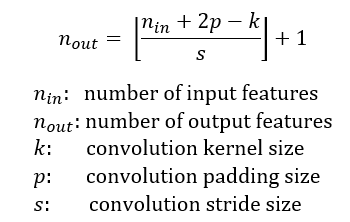

In [20]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/conv_out.png')

224-7/2 + 1 = 109.5 : 109가 된다. → 224+6-7/2 + 1 = 112.5 : 112

In [22]:
from tensorflow.keras.layers import ZeroPadding2D, MaxPooling2D

def do_first_conv(input_tensor):
    
    x = ZeroPadding2D(padding=(3, 3), name='conv1_pad')(input_tensor)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid', kernel_initializer='he_normal', name='conv')(x)
    x = BatchNormalization(axis=3, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    return x

input_tensor = Input(shape=(224, 224, 3))
output = do_first_conv(input_tensor)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
 conv (Conv2D)               (None, 112, 112, 64)      9472      
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 112, 112, 64)     256       
 n)                                                              
                                                                 
 activation_22 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)      0         
                                                           

In [23]:
def create_resnet(in_shape=(224, 224, 3), n_classes=10):
    input_tensor = Input(shape=in_shape)
    # 3->4->6->3
    
    #첫번째 7x7 Conv와 Max Polling 적용.  
    x = do_first_conv(input_tensor)
    
    # stage 2의 conv_block과 identity block 생성. stage2의 첫번째 conv_block은 strides를 1로 하여 크기를 줄이지 않음. 
    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    # shortcut + conv + /2
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    # shortcut
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    # shortcut
    
    # stage 3의 conv_block과 identity block 생성. stage3의 첫번째 conv_block은 strides를 2(default)로 하여 크기를 줄임 
    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    # shortcut + conv + /2
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    # shortcut
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    # shortcut
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')
    # shortcut

    # stage 4의 conv_block과 identity block 생성. stage4의 첫번째 conv_block은 strides를 2(default)로 하여 크기를 줄임
    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    # shortcut + conv + /2
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    # shortcut
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    # shortcut
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    # shortcut
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    # shortcut
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')
    # shortcut

    # stage 5의 conv_block과 identity block 생성. stage5의 첫번째 conv_block은 strides를 2(default)로 하여 크기를 줄임
    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    # shortcut + conv + /2
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    # shortcut
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    # shortcut
    

    
    # classification dense layer와 연결 전 GlobalAveragePooling 수행 
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', name='fc_01')(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(n_classes, activation='softmax', name='fc_final')(x)
    
    model = Model(inputs=input_tensor, outputs=output, name='resnet50')
    model.summary()
    
    return model

In [24]:
7*7*3*64 + 64

9472

In [25]:
model =  create_resnet(in_shape=(224,224,3), n_classes=10)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv (Conv2D)                  (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

→ 이후 학습은 이전에 했던 것과 동일하게 진행. 이번 실습에서는 모델 구축만 진행.